
Tasks:

[1] Make some image augmentations (2 other types at least). [1 point]

[2] Modify the model hyperparameters to achieve loss less than 2. [4 points]

[3] Use transfer learning for a suitable model of your choice, and add layers. [2 points]

[4] Test both models on an image of yours, show the keypoints. [2 points]

Bonus:

[+2 points]: Tune the model using keras hypermodel, refer to the documentation here.

[+1 point] Use kaggle.json from your account to access the dataset from kaggle directly.

[+1 point] Use kaggle.json from your account to access the dataset from kaggle directly.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet50 import ResNet50

bonus 1


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c facial-keypoints-detection


 98% 75.0M/76.3M [00:04<00:00, 23.0MB/s]
100% 76.3M/76.3M [00:04<00:00, 17.7MB/s]


In [ ]:
!unzip facial-keypoints-detection.zip


Archive:  facial-keypoints-detection.zip
  inflating: IdLookupTable.csv       
  inflating: SampleSubmission.csv    
  inflating: test.zip                
  inflating: training.zip            


In [ ]:
taining = pd.read_csv('/content/training.zip', compression='zip')

In [ ]:
taining.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
taining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
taining.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False


In [ ]:
train_clean = taining.dropna(axis=0, how='any', inplace=False)
train_clean = train_clean.reset_index(drop=True)

In [ ]:
train_clean.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2137,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
clean_imgs = []
for i in range(0, len(train_clean)):
  x_c = train_clean['Image'][i].split(' ') # split the pixel values based on the space
  clean_imgs.append(x_c)
clean_imgs_arr = np.array(clean_imgs, dtype='float')

In [ ]:
clean_imgs_arr = np.reshape(clean_imgs_arr, (train_clean.shape[0], 96, 96, 1))
train_ims_clean = np.asarray(clean_imgs_arr/255,dtype='float32') # scale the images

In [ ]:
clean_keypoints_df = train_clean.drop('Image', axis=1)
clean_keypoints_arr = clean_keypoints_df.to_numpy()

In [ ]:
clean_keypoints_arr.shape

(2140, 30)

In [ ]:
def vis_im_keypoint_notstandard(img, points, axs):
  axs.imshow(img.reshape(96, 96))
  xcoords = (points[0::2] + 0.)
  ycoords = (points[1::2] + 0.)
  axs.scatter(xcoords, ycoords, color='black', marker='o')

In [ ]:
clean_keypoints_arr=train_clean.drop(columns=["Image"]).to_numpy()

In [ ]:

import imgaug as ia
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.ContrastNormalization(alpha=(0.5, 1.5)),
    #iaa.Add(value=(-50, 50)),
    iaa.Multiply(mul=(0.6, 1.00)),
    #iaa.PerspectiveTransform(scale=(0.01, 0.1)),
    iaa.AdditiveGaussianNoise(scale=(0,0.05)),
    iaa.GaussianBlur(sigma=(0., 2.0))
       ])

aug_ims = []
aug_pts = []
for im, pt in zip(train_ims_clean, clean_keypoints_arr):
    f_im = seq(image=im)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(pt)
ims, keypoints = np.asarray(aug_ims), np.asarray(aug_pts)



/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


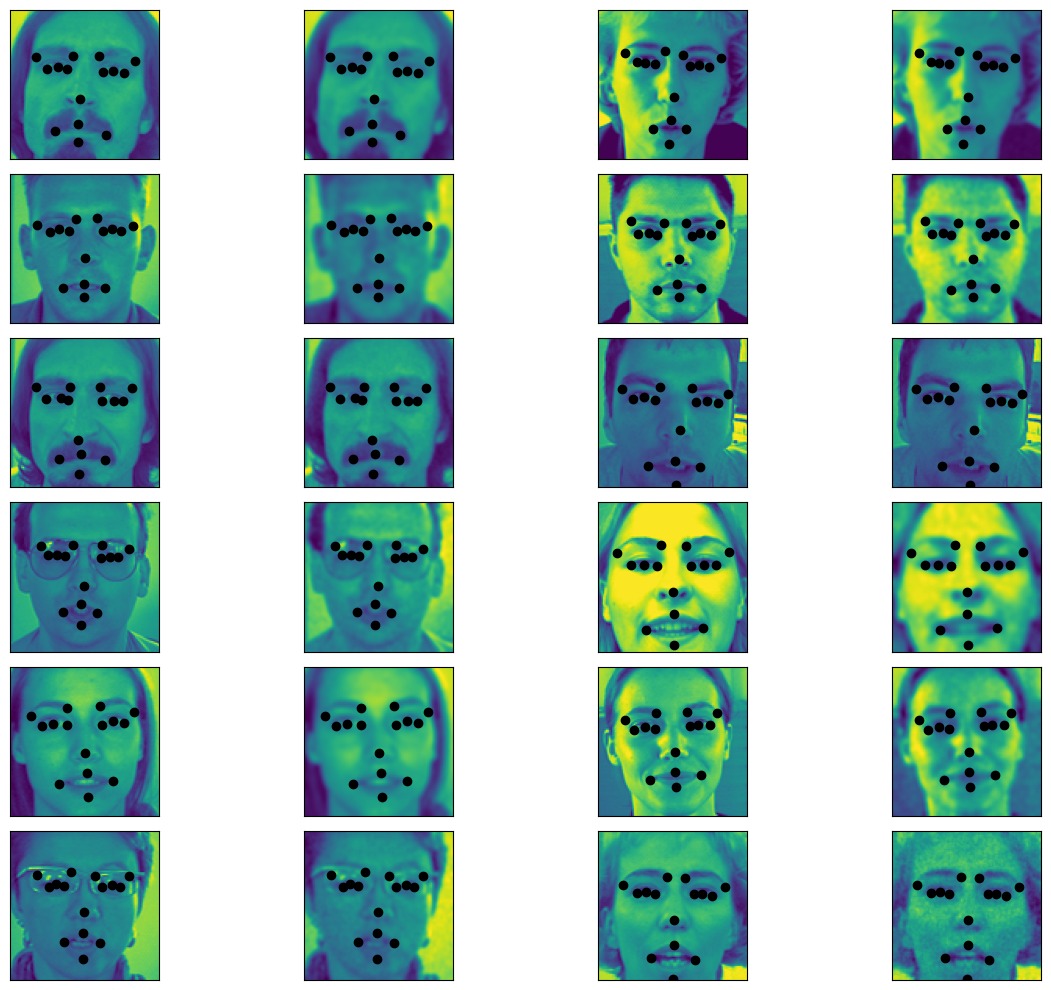

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 10))
npics= 24
count = 1
for i in range(npics):
  ipic = i # use this to see original and augmented image side by side
  ax = fig.add_subplot(npics//4 , 4, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(ims[ipic], keypoints[ipic], ax)
  count +=  1




plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.tight_layout()

plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(96, 96, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten(input_shape=(96, 96, 1)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(30))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 1024)              150995968 
                                                                 
 dense_1 (Dense)             (None, 30)                3

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

model.compile(optimizer='Adam' , loss=root_mean_squared_error)

#If we want to only display the rmse, then we could have used
#the (mertics) arguement.


In [ ]:
history = model.fit(ims,keypoints,epochs = 50)

Epoch 1/50
134/134 [==============================] - 16s 40ms/step - loss: 7.6225
Epoch 2/50
134/134 [==============================] - 5s 39ms/step - loss: 4.4566
Epoch 3/50
134/134 [==============================] - 5s 39ms/step - loss: 3.7448
Epoch 4/50
134/134 [==============================] - 5s 39ms/step - loss: 2.7544
Epoch 5/50
134/134 [==============================] - 5s 39ms/step - loss: 2.7895
Epoch 6/50
134/134 [==============================] - 5s 39ms/step - loss: 2.0307
Epoch 7/50
134/134 [==============================] - 5s 38ms/step - loss: 1.8841
Epoch 8/50
134/134 [==============================] - 5s 39ms/step - loss: 1.7276
Epoch 9/50
134/134 [==============================] - 5s 38ms/step - loss: 1.5998
Epoch 10/50
134/134 [==============================] - 5s 39ms/step - loss: 1.3621
Epoch 11/50
134/134 [==============================] - 5s 38ms/step - loss: 1.2534
Epoch 12/50
134/134 [==============================] - 5s 39ms/step - loss: 1.1932
Epoch 13/50


In [ ]:
def build_model(hp):
  model = Sequential()
  hp_units1 = hp.Int('units', min_value=32, max_value=96, step=32)
  hp_units2 = hp.Int('units', min_value=64, max_value=128, step=32)
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(96, 96, 1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Flatten(input_shape=(96, 96, 1)))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(30))
  model.compile(optimizer="Adam", loss=root_mean_squared_error, metrics=['accuracy'])
  return model

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 18.2 MB/s eta 0:00:00


Bonus 2


In [ ]:
import keras_tuner as kt

In [ ]:
tuner = kt.Hyperband(build_model,objective='val_loss',max_epochs=20)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
tuner.search(ims, keypoints, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Trial 3 Complete [00h 00m 41s]
val_loss: 23.129804611206055

Best val_loss So Far: 17.487506866455078
Total elapsed time: 00h 02m 06s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print("The best hyperparameters are :")
print(best_hps.get('units'))

The best hyperparameters are :
64


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(ims, keypoints, epochs=20)#testing on our data set using our new hypreparameters

Epoch 1/20
134/134 [==============================] - 7s 39ms/step - loss: 8.4094 - accuracy: 0.5692
Epoch 2/20
134/134 [==============================] - 5s 39ms/step - loss: 4.2045 - accuracy: 0.7456
Epoch 3/20
134/134 [==============================] - 5s 39ms/step - loss: 3.3766 - accuracy: 0.7708
Epoch 4/20
134/134 [==============================] - 5s 39ms/step - loss: 2.8788 - accuracy: 0.7935
Epoch 5/20
134/134 [==============================] - 5s 39ms/step - loss: 2.3262 - accuracy: 0.8110
Epoch 6/20
134/134 [==============================] - 5s 39ms/step - loss: 1.9975 - accuracy: 0.8357
Epoch 7/20
134/134 [==============================] - 5s 39ms/step - loss: 1.7559 - accuracy: 0.8453
Epoch 8/20
134/134 [==============================] - 5s 39ms/step - loss: 1.3903 - accuracy: 0.8549
Epoch 9/20
134/134 [==============================] - 5s 39ms/step - loss: 1.3645 - accuracy: 0.8673
Epoch 10/20
134/134 [==============================] - 5s 39ms/step - loss: 1.2918 - accura

[4] Test both models on an image of yours, show the keypoints. [2 points]

 Use transfer learning for a suitable model of your choice, and add layers. [2 points]

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/Hajaar.jpg')



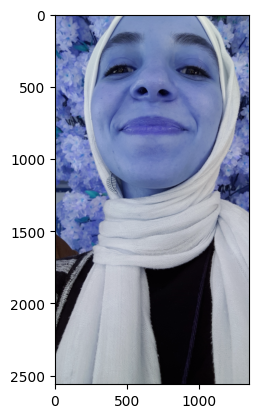

In [ ]:
plt.imshow(image)

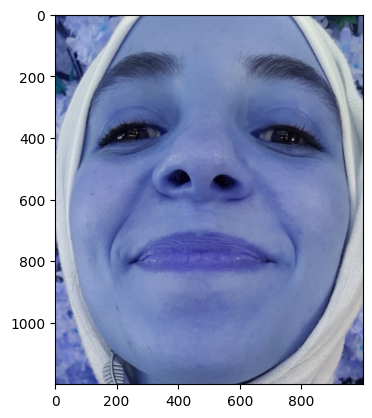

In [ ]:
plt.imshow(image[0:1200,200:1200,:])

In [ ]:
resized = cv2.resize(image[0:1200,200:1200,:], (96, 96))


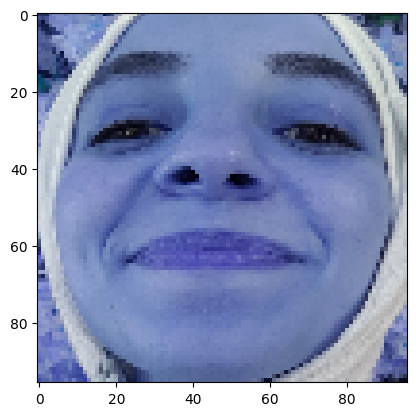

In [ ]:
plt.imshow(resized)

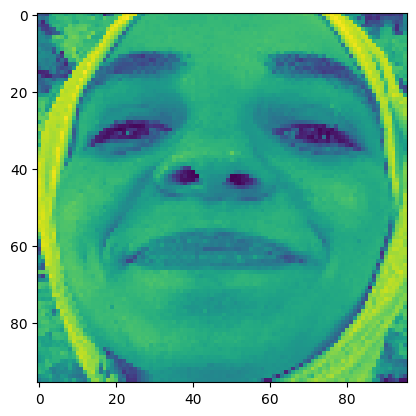

In [ ]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray = gray / 255.0
plt.imshow(gray)

In [ ]:
img_reshaped = np.reshape(gray, (1, 96, 96, 1))
prediction = model.predict(img_reshaped)

1/1 [==============================] - 0s 202ms/step


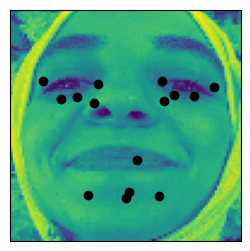

In [ ]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111, xticks=[], yticks=[])
vis_im_keypoint_notstandard(gray, prediction[0], ax)
plt.show()

In [ ]:
MODEL = ResNet50(include_top=False, weights='imagenet', input_shape=(96,96, 3))


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
MODEL.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model = Sequential()
model.add(MODEL)
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten(input_shape=(96, 96, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(30))
model.summary()

model.compile(optimizer='Adam' , loss=root_mean_squared_error)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 2048)       8192      
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              18875392  
                                                                 
 dense_5 (Dense)             (None, 30)               

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 2048)       8192      
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              18875392  
                                                                 
 dense_5 (Dense)             (None, 30)               

In [ ]:
copy = []
for i in ims:
    Converted_img = cv2.convertScaleAbs(i, alpha=(255.0/65535.0))
    Resized_img = cv2.resize(Converted_img, (96, 96), interpolation = cv2.INTER_LINEAR)

    Resized_img = cv2.cvtColor(Resized_img, cv2.COLOR_GRAY2RGB)
    copy.append(Resized_img)

copy = np.asarray(copy)


In [ ]:
history = model.fit(copy, keypoints, epochs=20)

Epoch 1/20
134/134 [==============================] - 88s 339ms/step - loss: 5.2504
Epoch 2/20
134/134 [==============================] - 42s 311ms/step - loss: 3.6469
Epoch 3/20
134/134 [==============================] - 42s 314ms/step - loss: 3.5190
Epoch 4/20
134/134 [==============================] - 42s 313ms/step - loss: 3.4514
Epoch 5/20
134/134 [==============================] - 42s 312ms/step - loss: 3.5427
Epoch 6/20
134/134 [==============================] - 42s 313ms/step - loss: 3.4454
Epoch 7/20
134/134 [==============================] - 42s 313ms/step - loss: 3.3969
Epoch 8/20
134/134 [==============================] - 42s 312ms/step - loss: 3.4112
Epoch 9/20
134/134 [==============================] - 42s 313ms/step - loss: 3.4070
Epoch 10/20
134/134 [==============================] - 42s 312ms/step - loss: 3.3891
Epoch 11/20
134/134 [==============================] - 42s 312ms/step - loss: 3.4247
Epoch 12/20
133/134 [============================>.] - ETA: 0s - loss: 3.3